In [15]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import warnings
warnings.filterwarnings("ignore")

# PART(1-A)

In [16]:
#Import the gdp file
gdp_original = pd.read_csv('C:/Users/adity/Downloads/Data Science/EDA/GDP Assignment/GDP.csv')
gdp_original.head(11)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [17]:
# Drop Unnecessary columns(union teritories), allindia gdp and westBengal due to there is no data present for it
gdp = gdp_original.drop(['Duration','West Bengal1','Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry','All_India GDP'], axis = 1)
gdp

,Items Description,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
0,GSDP - CURRENT PRICES (` in Crore),379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,72720.00,...,11839.00,227872.00,266628.00,436465.00,11165.00,751485.00,359433.00,19208.00,724049.00,115523.00
1,GSDP - CURRENT PRICES (` in Crore),411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,82820.00,...,13619.00,258275.00,297734.00,494004.00,12338.00,855481.00,401493.00,21663.00,822903.00,131835.00
2,GSDP - CURRENT PRICES (` in Crore),464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,94764.00,...,16612.00,291709.00,334714.00,549701.00,13862.00,971090.00,452186.00,25593.00,944146.00,149817.00
3,GSDP - CURRENT PRICES (` in Crore),526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,104369.00,...,18414.00,321971.00,368011.00,612194.00,15209.00,1092564.00,511178.00,29667.00,1043371.00,161985.00
4,GSDP - CURRENT PRICES (` in Crore),609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,NaN,...,NaN,341887.00,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00
5,GSDP - CURRENT PRICES (` in Crore),699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,NaN,...,NaN,378991.00,NaN,NaN,NaN,1338766.00,654294.00,NaN,NaN,NaN
6,(% Growth over previous year),8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,15.03,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12
7,(% Growth over previous year),12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,21.98,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64
8,(% Growth over previous year),13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,10.85,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12
9,(% Growth over previous year),15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,NaN,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65


In [18]:
#create subset of data frame for'GSDP - CURRENT PRICES (` in Crore)'
gsdp = gdp.loc[0:6]
gsdp.head()

,Items Description,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
0,GSDP - CURRENT PRICES (` in Crore),379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,...,11839.0,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0
1,GSDP - CURRENT PRICES (` in Crore),411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,...,13619.0,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0
2,GSDP - CURRENT PRICES (` in Crore),464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,...,16612.0,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0
3,GSDP - CURRENT PRICES (` in Crore),526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,...,18414.0,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0
4,GSDP - CURRENT PRICES (` in Crore),609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,...,NaN,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0


In [20]:
# create subset of data frame for (% Growth over previous year)
grow = gdp.loc[6:11]
grow.head()

,Items Description,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
6,(% Growth over previous year),8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,15.03,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12
7,(% Growth over previous year),12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,21.98,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64
8,(% Growth over previous year),13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,10.85,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12
9,(% Growth over previous year),15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,NaN,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65
10,(% Growth over previous year),14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,...,NaN,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN


In [21]:
#insert a column years for analysis
grow.insert(1, "years", [2012, 2013, 2014, 2015,2016], True)
grow.head()

,Items Description,years,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
6,(% Growth over previous year),2012,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,15.03,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12
7,(% Growth over previous year),2013,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,21.98,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64
8,(% Growth over previous year),2014,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.85,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12
9,(% Growth over previous year),2015,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,NaN,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65
10,(% Growth over previous year),2016,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,...,NaN,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN


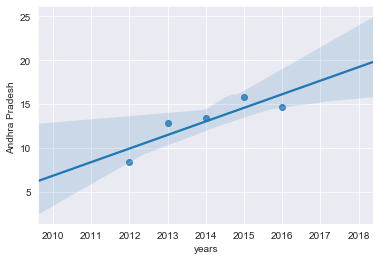

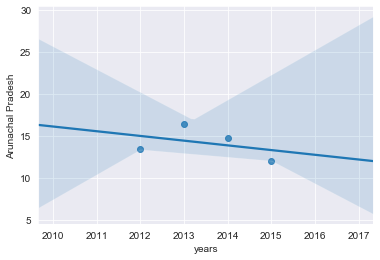

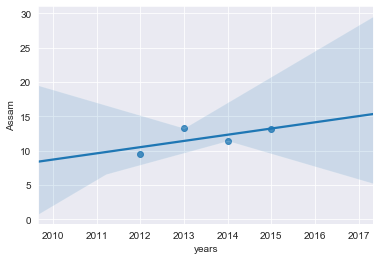

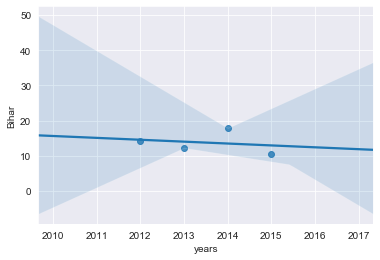

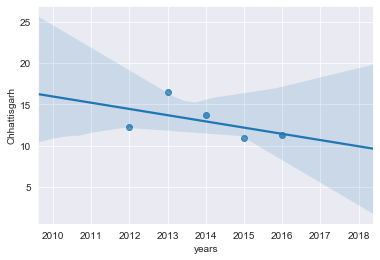

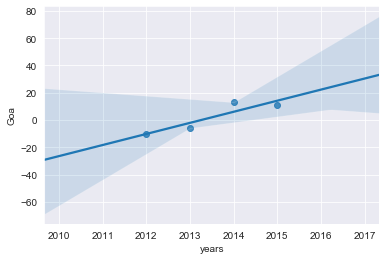

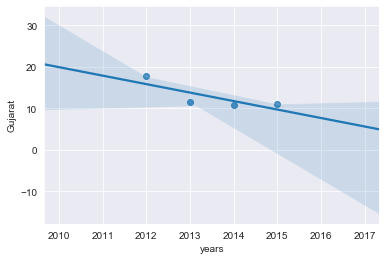

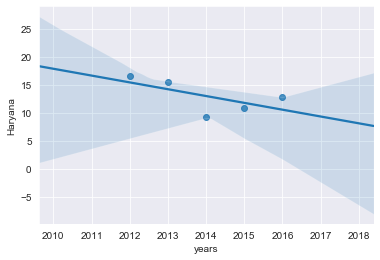

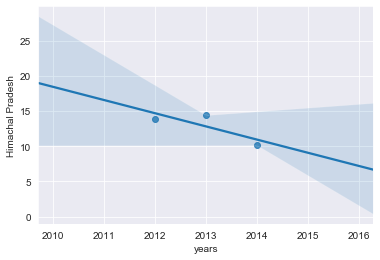

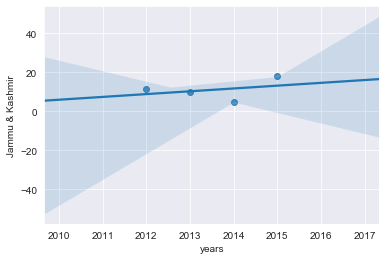

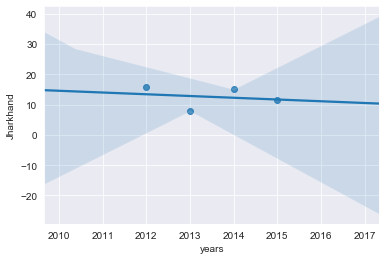

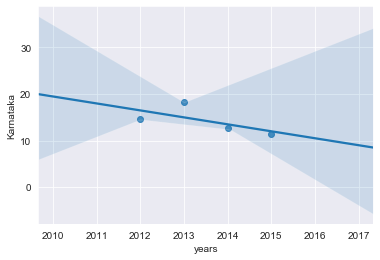

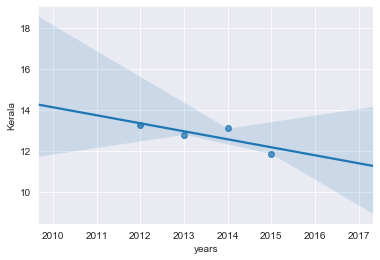

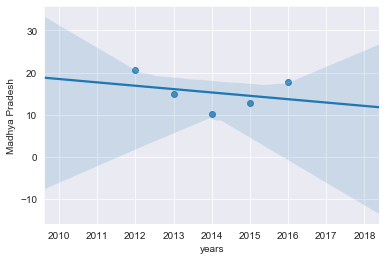

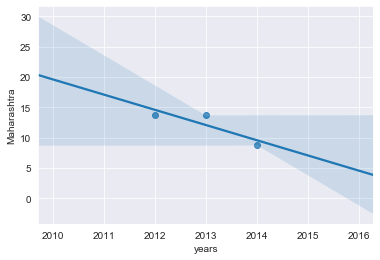

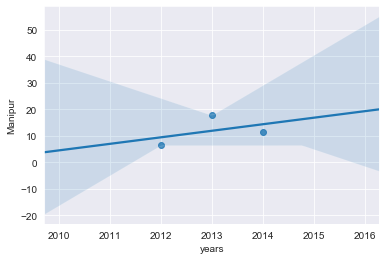

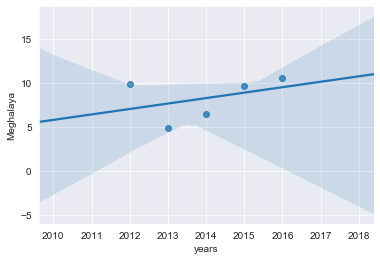

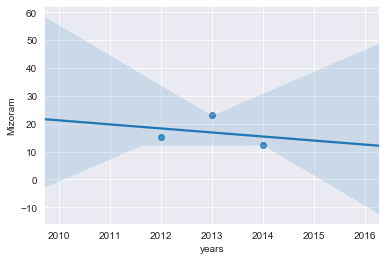

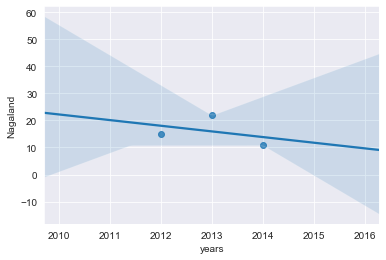

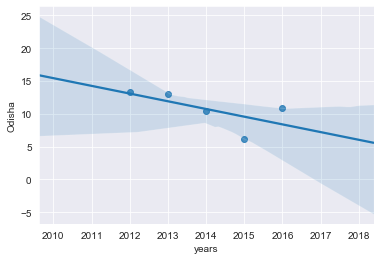

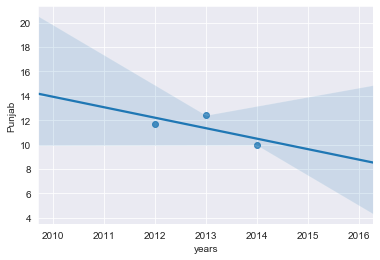

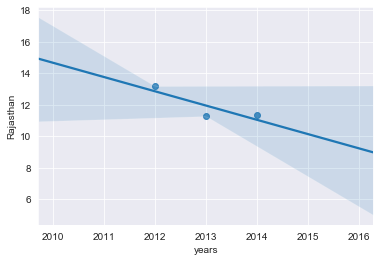

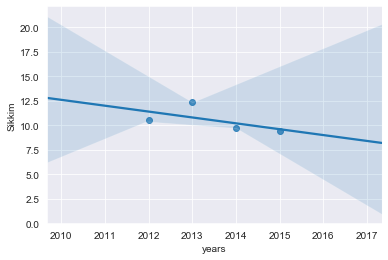

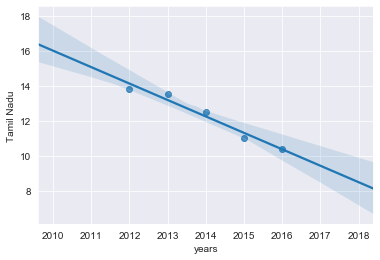

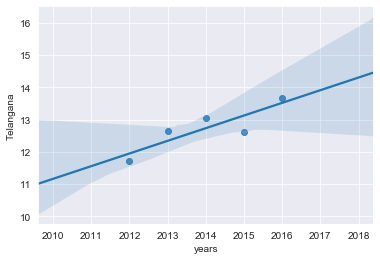

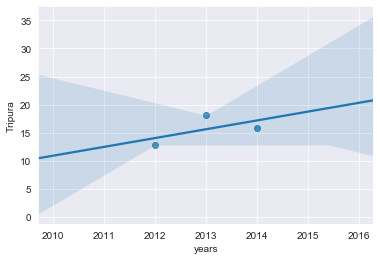

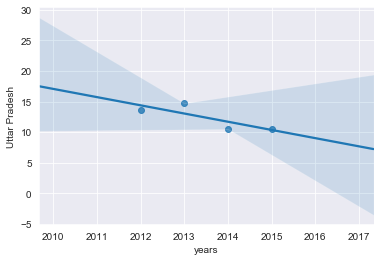

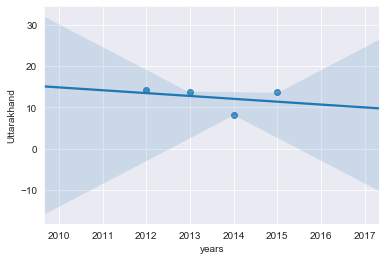

In [45]:
#plot the best fit line for all the year and states to analyze the growth rate of all the states
cols = []
cols = grow.columns
n = len(cols)
cols = cols[1:n]
for i in range (1, len(cols)):
    sns.regplot(x = cols[0], y = cols[i], data = grow)
    plt.show()
plt.close()    

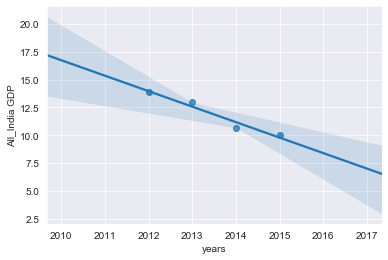

In [59]:
#Plot the best fit line for the nation to analyze the growth rate
nation = gdp_original[['All_India GDP']]
nation = nation[6:10]
nation.insert(1, "years", [2012, 2013, 2014, 2015], True)
sns.regplot(x ='years', y='All_India GDP',data = nation)
plt.show()

In [118]:
#create a dataframe to calculate the average
avg = pd.DataFrame(grow.iloc[0:5,2:30])
avg

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
6,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,15.03,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12
7,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,21.98,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64
8,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,10.85,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12
9,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,NaN,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65
10,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,NaN,...,NaN,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN


In [119]:
averages = [avg[key].describe()['mean'] for key in avg]
indexes = avg.index.tolist()
indexes.append('mean')
avg.reindex(indexes)
# Adding the mean row to the bottom of the DataFrame

i = 0
for key in avg:
    avg.set_value('mean', key, averages[i])
    i += 1
avg = avg.sort_values(by='mean', axis=1, ascending=False)    

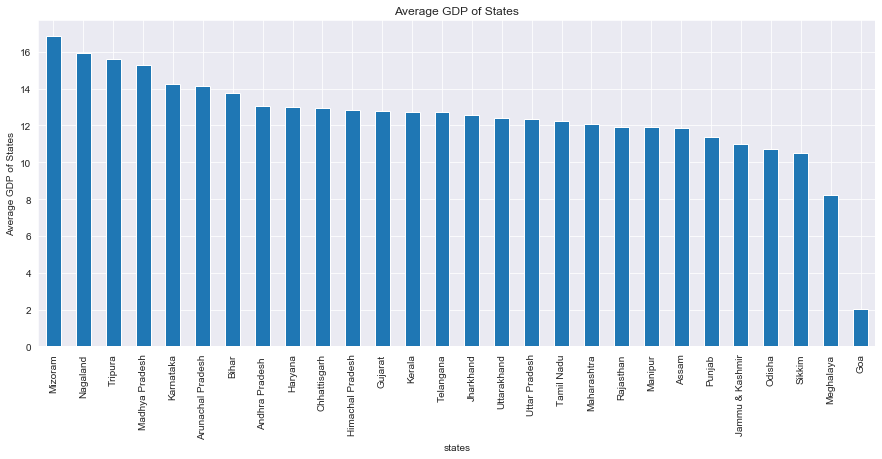

In [120]:
avg1 = avg.loc['mean']
avg1.plot(kind = 'bar')
plt.title('Average GDP of States')
plt.xlabel('states')
plt.ylabel('Average GDP of States')
plt.gcf().set_size_inches(15,6)
plt.show()

-> How will you compare the growth rates of any two states?
A)  We can compare the growth rate of any two states from the above bar chart because states having high average growth rate have higher growth rate and state having low average growth rate have low growth rate.

-> Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.
A)   From the above bar chart we can clearly observe that Mizoram, Nagaland, Tripura are growing consistently growing fast, and Goa has beenstruggling.
Top 3 Fastest Growing States-
     .Mizoram
     .Nagaland
     .Tripura
Top 3 Slowest Growing States-
     .Goa
     .Meghalaya
     .Sikkim

In [113]:
nation_grow = pd.DataFrame(gdp_original.iloc[6:11, 35])
nation_grow
nation_grow[['All_India GDP']].mean(axis=0)


All_India GDP    11.798
dtype: float64

Nation's Growth Rate is ->   11.798

Plotting Year vs % Growth for Nation and my Home State(i.e. Odisha)

In [235]:
#Create a subset of dataframe to do the comparision Between nation growth and my home state 
nation_growth_rate = nation_grow[['All_India GDP']].mean(axis=0)
home_state_growth_rate = grow[['Odisha']].mean(axis=0)
print("home_state_growth_rate =",home_state_growth_rate) 
# print(\n)
print('nation_growth_rate =',nation_growth_rate)

home_state_growth_rate = Odisha    10.74
dtype: float64
nation_growth_rate = All_India GDP    11.798
dtype: float64


Plot the total GDP of the states for the year 2015-16:

In [115]:
#Create a dataframe for year 2015-16
row = pd.DataFrame(gdp.iloc[4,2:29])
# row.drop([' Items Description '], axis =1)
# row = row.sort_values(by= '4', axis=1, ascending=False)
row= row.sort_values(by=4, axis=0, ascending=False)
row

,4
Tamil Nadu,1.21267e+06
Uttar Pradesh,1.1538e+06
Karnataka,1.02707e+06
Gujarat,994316
Kerala,588337
Telangana,575631
Madhya Pradesh,543975
Haryana,485184
Bihar,413503
Odisha,341887


I will use bar plot here, because by the bar plot it can easier to plot and visualize the GDP for each state For year 2015-16

<Figure size 864x576 with 0 Axes>

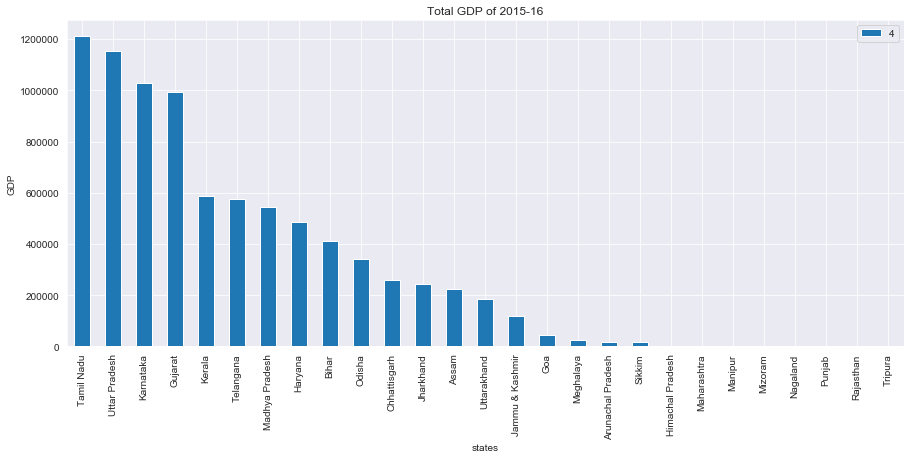

In [116]:
plt.figure(figsize =(12,8))
row.plot(kind = 'bar')
plt.title('Total GDP of 2015-16')
plt.xlabel('states')
plt.ylabel('GDP')
plt.gcf().set_size_inches(15,6)
plt.show()

Identify the top 5 and the bottom 5 states based on total GDP.

Top 5 States are:
    .Tamil Nadu
    .Uttar Pradesh
    .Karnataka
    .Gujurat
    .Kerala

Bottom 5 States are:
    .Sikkim
    .Arunachal Pradesh
    .Meghalaya
    .Goa
    Jammu & Kashmir

What insights can you draw from this graph?

From this graph we can conclude the GDP of each state, which states are growing fastly and states are performing very poor.
By deviding this data by the population of the state we can calculate the per capita, then we can analyze the demand of 
country made products. 

What states are performing poorly

In year 2015 sikkim, Arunachal Pradesh, Meghalaya, Goa states are performing poorly

# PART (1-B)

In [22]:
# path = r'C://Users//adity//Downloads//Data Science//EDA//GDP Assignment//csv files' 
# Reading all the paths
# all_files = glob.glob(path + "//*.csv")

def clean_state(x):
    x = x.replace('NAD-','').replace('-GSVA_cur_2016-17.csv','').replace('GSVA_cur_2015-16.csv','')
    x = x.replace('-GSVA_cur_2014-15.csv','').strip()
    x = x.replace('_',' ')
    return x
def clean_Item(x):
    x = x.replace('*','')
    return x
gsdp_df_list = []
gsdp_directory = r'C://Users//adity//Downloads//Data Science//EDA//GDP Assignment//csv files'
for file in os.listdir(gsdp_directory):
    full_path_gsdp_file = gsdp_directory + '/'+ file
    state_gsdp_df = pd.read_csv(full_path_gsdp_file,sep = ',', encoding = 'iso8859')
    state_gsdp_df['filename'] = file.split('.')[0]
    state_gsdp_df['Item'] = state_gsdp_df['Item'].apply(clean_Item)
    state_gsdp_df = state_gsdp_df[['Item', '2014-15']]
    state_gsdp_df.set_index('Item', inplace = True)
    state_gsdp_df = state_gsdp_df.T
    state_gsdp_df['state'] = clean_state(file.split('.')[0])
    gsdp_df_list.append(state_gsdp_df)
combined_gsdp_df = pd.concat(gsdp_df_list, sort = False)
combined_gsdp_df = combined_gsdp_df.reset_index()
combined_gsdp_df = combined_gsdp_df.rename(columns = {'index':'Duration'})
final_gsdp_filename = 'C://Users//adity//Downloads//Data Science//EDA//GDP Assignment//Data1-B//combined_gsdp.csv'
combined_gsdp_df.to_csv(final_gsdp_filename, index = False)


In [23]:
# Filter out all the union teritories as those are directly governed by Goverment
ut_filter = combined_gsdp_df['state'].isin(['chandigarh', 'Delhi', 'Puducherry'])
combined_gsdp_df = combined_gsdp_df.loc[~ut_filter]

In [24]:
combined_gsdp_df

Item,Duration,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",...,Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),state
0,2014-15,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,...,2200897.0,4215389.0,22032942.0,48825542.0,5512100.00,1690800.0,52646842.0,501510.0,104977.0,Andhra Pradesh
1,2014-15,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,...,243867.0,218728.0,631844.0,1636292.0,70099.00,30272.0,1676119.0,14870.0,112718.0,Arunachal Pradesh
2,2014-15,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,...,1373611.0,1795658.0,9307109.0,18666897.0,1725309.00,582406.0,19809800.0,326780.0,60621.0,Assam
3,2014-15,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,...,2078171.0,4587589.0,22179969.0,36184863.0,3213546.00,2006421.0,37391988.0,1101240.0,33954.0,Bihar
4,2014-15,16233.0,1659.0,13992.0,388.0,194.0,179.0,16412.0,149631.0,29741.0,...,183889.0,156543.0,2426008.0,2755113.0,52622.00,23309.0,2784426.0,11120.0,250398.0,Chandigarh
5,2014-15,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,...,867982.0,1112232.0,7588778.0,22228481.0,2601791.00,1332092.0,23498180.0,270530.0,86860.0,Chhattisgarh
7,2014-15,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,...,346486.0,180431.0,1738217.0,3597882.0,527279.00,61854.0,4063307.0,14950.0,271793.0,Goa
8,2014-15,13769969.0,9671086.0,2698910.0,761616.0,638357.0,2117218.0,15887187.0,24087538.0,3409983.0,...,2576195.0,3123413.0,30220377.0,79131102.0,12353171.04,1981546.0,89502727.0,633590.0,141263.0,Gujarat
9,2014-15,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,...,1036377.0,2001581.0,19226568.0,39828404.0,4985670.00,1067867.0,43746207.0,266620.0,164077.0,Haryana
10,2014-15,1514981.0,853758.0,110304.0,540950.0,9968.0,33385.0,1548366.0,2543637.0,767268.0,...,553974.0,923164.0,4133326.0,9800853.0,895317.00,259291.0,10436879.0,70840.0,147330.0,Himachal Pradesh


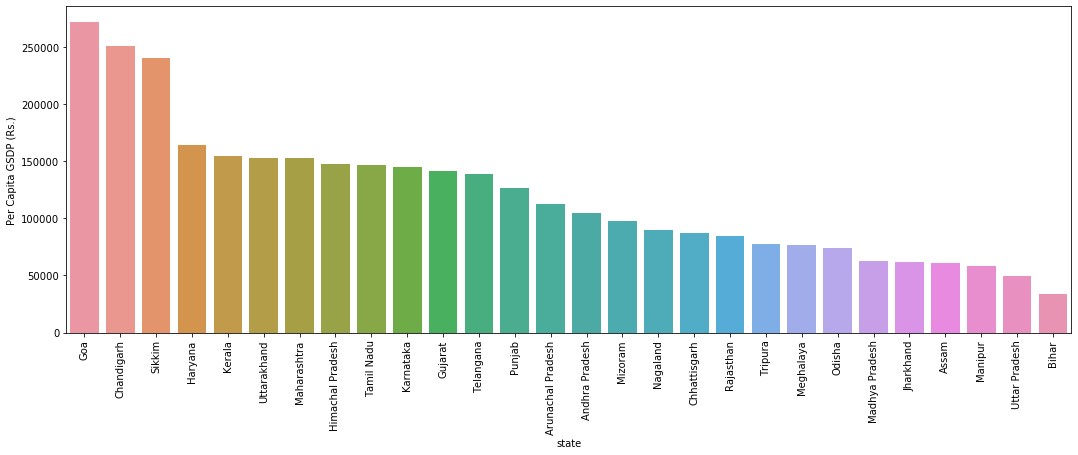

In [25]:
#plot the Bar graph for all the states as per their Percapita GSDP(Rs.)
new = combined_gsdp_df.sort_values(by='Per Capita GSDP (Rs.)', axis=0, ascending=False)
sns.barplot(x ='state', y ='Per Capita GSDP (Rs.)', data = new)
plt.gcf().set_size_inches(18,6)
plt.xticks(rotation = 90)
plt.show()


From above fgraph We can clearly observe that

Top5 states are
Goa, Sikkim, Haryana, Kerala, Uttarakhand

Bottom5 states are
Bihar,UttarPradesh, Manipur, Assam, Jharakhand

Ratio Between The Top Most State And The Bottom State

Goa(per capita(Rs)) = 271793.0
Bihar(per capita(Rs)) = 33954.0
The Ratio Is = 8.0047

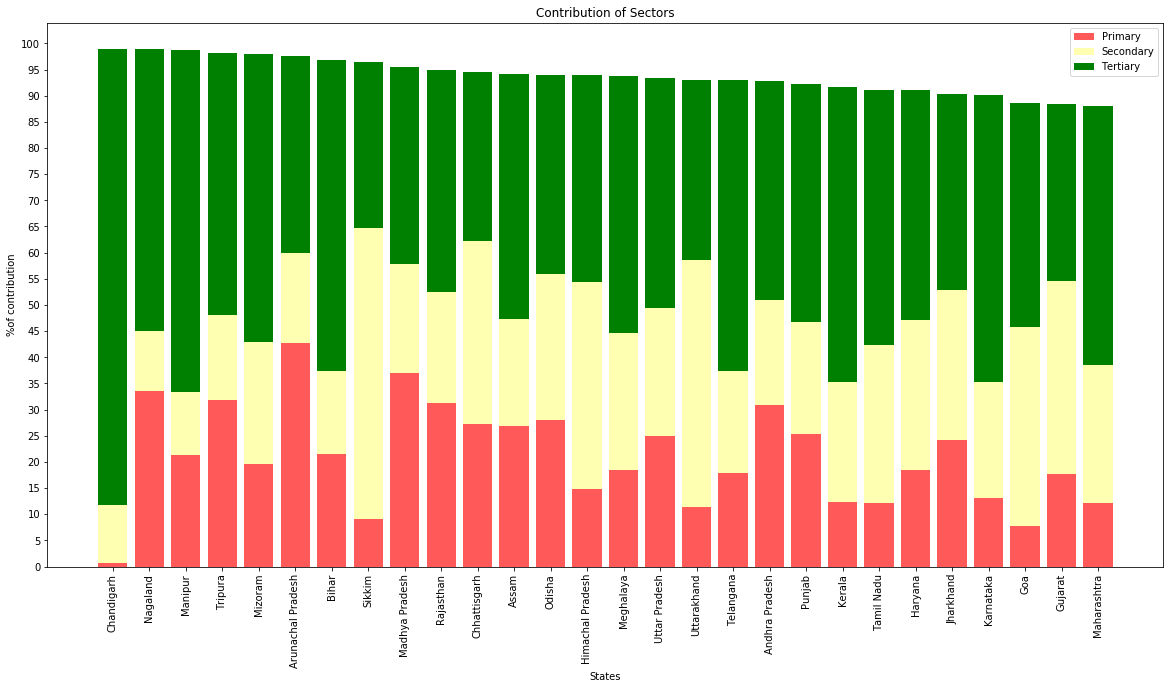

In [26]:
#Plotting stacked bar graph
contribution =pd.DataFrame(combined_gsdp_df[['Primary','Secondary','Tertiary','Gross State Domestic Product','Per Capita GSDP (Rs.)','state']]) 
combined_gsdp_df['%Primary'] =round((combined_gsdp_df.Primary/contribution['Gross State Domestic Product'])*100,2)
combined_gsdp_df['%Secondary'] =round((combined_gsdp_df.Secondary/contribution['Gross State Domestic Product'])*100,2)
combined_gsdp_df['%Tertiary'] = round((combined_gsdp_df.Tertiary/contribution['Gross State Domestic Product'])*100,2)
combined_gsdp_df['Total_Sector Contribution'] = combined_gsdp_df['%Primary'] +combined_gsdp_df['%Secondary']+combined_gsdp_df['%Tertiary']
cont = combined_gsdp_df[['state','Total_Sector Contribution','%Primary','%Secondary','%Tertiary']]

cont = combined_gsdp_df.sort_values(by='Total_Sector Contribution',ascending=False)
Primary = cont['%Primary']
Secondary = cont['%Secondary']
Tertiary = cont['%Tertiary']
States = cont['state']

plt.figure(figsize=(20,10))
primary_barplot = plt.bar(States, Primary, color='red', alpha=0.65)
secondary_barplot = plt.bar(States, Secondary, bottom=list(Primary),color='yellow',alpha=0.3)
tertiary_barplot = plt.bar(States, Tertiary, bottom = list( np.array(Primary)+np.array(Secondary)),color='green',alpha=1)

plt.ylabel('%of contribution')
plt.title('Contribution of Sectors')
plt.xticks(States,rotation=90)
plt.yticks(np.arange(0, 105, 5))
plt.xlabel('States')
plt.legend((primary_barplot[0], secondary_barplot[0], tertiary_barplot[0]), ('Primary', 'Secondary', 'Tertiary'))
plt.show()

In [130]:
combined_gsdp_df['Per Capita GSDP (Rs.)'].max()


271793.0

In [131]:
combined_gsdp_df['Per Capita GSDP (Rs.)'].count()

28

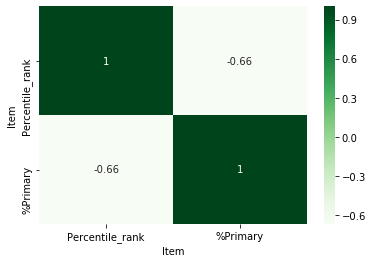

In [27]:
combined_gsdp_df['Percentile_rank'] = round(100*combined_gsdp_df['Per Capita GSDP (Rs.)'].rank(pct=True),2)
corr = combined_gsdp_df[['Percentile_rank', '%Primary']].corr()
# corr.style.background_gradient(cmap='YlGnBu',axis=None).set_precision(2)
sns.heatmap(corr, cmap = "Greens", annot =True)
plt.show()

correlation between percentile rank of lower GDP States and Primary Sector percent contribution

As we can see both these values are negatively corelated

In [136]:
#Categorise The states acoording to per capita GSDP(Rs.) quantile ranges
c4 =  combined_gsdp_df['Per Capita GSDP (Rs.)'].quantile(0.2) 

c3 = combined_gsdp_df['Per Capita GSDP (Rs.)'].quantile(0.5) 

c2 = combined_gsdp_df['Per Capita GSDP (Rs.)'].quantile(0.85) 

c1 = combined_gsdp_df['Per Capita GSDP (Rs.)'].quantile(1)

def conditions(combined_gsdp_df):
    if (combined_gsdp_df['Per Capita GSDP (Rs.)'] <=c1 and combined_gsdp_df['Per Capita GSDP (Rs.)'] >=c2 ): 
        return'C1'
    elif (combined_gsdp_df['Per Capita GSDP (Rs.)'] <c2 and combined_gsdp_df['Per Capita GSDP (Rs.)'] >=c3):
        return'C2'
    elif  (combined_gsdp_df['Per Capita GSDP (Rs.)'] <c3 and combined_gsdp_df['Per Capita GSDP (Rs.)'] >=c4):
        return'C3'
    elif  (combined_gsdp_df['Per Capita GSDP (Rs.)'] <=c4):
        return'C4'
    else:
        return 0
combined_gsdp_df['quantile_category'] = combined_gsdp_df.apply(conditions, axis=1)

In [137]:
combined_gsdp_df

Item,Duration,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",...,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),state,%Primary,%Secondary,%Tertiary,Percentile_rank_on_per_capita_GDP,Percentile_rank,quantile_category
0,2014-15,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,...,52646842.0,501510.0,104977.0,Andhra Pradesh,30.97,19.92,41.85,50.00,50.00,C3
1,2014-15,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,...,1676119.0,14870.0,112718.0,Arunachal Pradesh,42.77,17.15,37.70,53.57,53.57,C2
2,2014-15,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,...,19809800.0,326780.0,60621.0,Assam,26.89,20.36,46.98,14.29,14.29,C4
3,2014-15,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,...,37391988.0,1101240.0,33954.0,Bihar,21.45,16.01,59.32,3.57,3.57,C4
4,2014-15,16233.0,1659.0,13992.0,388.0,194.0,179.0,16412.0,149631.0,29741.0,...,2784426.0,11120.0,250398.0,Chandigarh,0.59,11.23,87.13,96.43,96.43,C1
5,2014-15,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,...,23498180.0,270530.0,86860.0,Chhattisgarh,27.24,35.06,32.30,39.29,39.29,C3
7,2014-15,308507.0,140421.0,30141.0,15744.0,122201.0,3622.0,312129.0,1177608.0,204110.0,...,4063307.0,14950.0,271793.0,Goa,7.68,38.09,42.78,100.00,100.00,C1
8,2014-15,13769969.0,9671086.0,2698910.0,761616.0,638357.0,2117218.0,15887187.0,24087538.0,3409983.0,...,89502727.0,633590.0,141263.0,Gujarat,17.75,36.90,33.76,64.29,64.29,C2
9,2014-15,8015238.0,4636731.0,2916173.0,352254.0,110080.0,25186.0,8040424.0,7756921.0,1101919.0,...,43746207.0,266620.0,164077.0,Haryana,18.38,28.71,43.95,89.29,89.29,C1
10,2014-15,1514981.0,853758.0,110304.0,540950.0,9968.0,33385.0,1548366.0,2543637.0,767268.0,...,10436879.0,70840.0,147330.0,Himachal Pradesh,14.84,39.47,39.60,75.00,75.00,C2


In [226]:
#Create Different Subsets according to quantile ranges
C1df=combined_gsdp_df[combined_gsdp_df.quantile_category=='C1'] 
C2df=combined_gsdp_df[combined_gsdp_df.quantile_category=='C2'] 
C3df=combined_gsdp_df[combined_gsdp_df.quantile_category=='C3'] 
C4df=combined_gsdp_df[combined_gsdp_df.quantile_category=='C4']
C4df

Item,Duration,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",...,Population ('00),Per Capita GSDP (Rs.),state,%Primary,%Secondary,%Tertiary,Percentile_rank_on_per_capita_GDP,Percentile_rank,quantile_category,Total_Sector Contribution
2,2014-15,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,...,326780.0,60621.0,Assam,26.89,20.36,46.98,14.29,14.29,C4,94.23
3,2014-15,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,...,1101240.0,33954.0,Bihar,21.45,16.01,59.32,3.57,3.57,C4,96.78
11,2014-15,3211065.0,2094466.0,562503.0,445149.0,108947.0,2037289.0,5248354.0,4114148.0,337489.0,...,349660.0,62091.0,Jharkhand,24.17,28.75,37.46,17.86,17.86,C4,90.38
14,2014-15,16235647.0,13216013.0,1932769.0,965588.0,121277.0,1618373.0,17854020.0,4368833.0,1272905.0,...,765180.0,62989.0,Madhya Pradesh,37.04,20.84,37.59,21.43,21.43,C4,95.47
16,2014-15,383140.0,226583.0,75483.0,45831.0,35243.0,NaN,383140.0,49501.0,27490.0,...,30873.0,58442.0,Manipur,21.24,12.20,65.25,10.71,10.71,C4,98.69
28,2014-15,25097754.0,16215212.0,7096876.0,1404936.0,380730.0,901501.0,25999255.0,12261649.0,2030625.0,...,2109940.0,49450.0,Uttar Pradesh,24.92,24.49,44.06,7.14,7.14,C4,93.47


In [140]:
#Grouping data on categories
categorized_df = combined_gsdp_df.groupby(['quantile_category']).sum()
categorized_df.drop(columns=['Primary','Secondary','Tertiary'
                             ,'Taxes on Products', 'Subsidies on products','TOTAL GSVA at basic prices','Per Capita GSDP (Rs.)'],axis = 1,inplace=True)


In [227]:
categorized_df

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants",...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Population ('00),%Primary,%Secondary,%Tertiary,Percentile_rank_on_per_capita_GDP,Percentile_rank
quantile_category,,,,,,,,,,,,,,,,,,,,,
C1,14408042.0,7964173.0,4633748.0,872723.0,937398.0,589140.0,13908424.0,2030739.0,11397772.0,14960940.0,...,15338693.0,3755181.0,8216465.0,104715103.0,638863.0,48.11,156.55,262.03,464.29,464.29
C2,75209022.0,47550095.0,19363891.0,5603213.0,2691822.0,10373346.0,109196530.0,13823378.0,40653562.0,61238862.0,...,92121446.0,18567815.0,36253657.0,586380452.0,4036763.0,167.32,260.34,399.74,610.71,610.71
C3,42226888.0,23676317.0,11135794.0,4045895.0,3368881.0,10835771.0,22038331.0,4604774.0,15707921.0,17245309.0,...,16224118.0,7927173.0,12815417.0,177966387.0,2031623.0,220.63,181.54,363.04,300.00,300.00
C4,56735044.0,39331055.0,11901405.0,3673623.0,1828960.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,...,24177534.0,13486630.0,15859015.0,233252066.0,4683673.0,155.71,122.65,290.66,75.00,75.00


In [141]:
#making different dataframes for all categories
category_df_list =[]

for category in list(categorized_df.index):
    category_df = categorized_df.T[category]
    category_df = category_df.reset_index()
    category_df.rename(columns={category:'Values','index':'Items'},inplace = True)
    category_df= category_df.sort_values(by='Values',ascending = False)
    category_df = category_df.reset_index(drop=True)
    category_gsdp_val = list(category_df['Values'])[0]
    def get_contri_percent(x):
        ret_val = round(100*(x/category_gsdp_val),2)
        return ret_val
    
    category_df['%Contri In GDP'] = category_df['Values'].apply(get_contri_percent)
    end = 4
    while category_df.loc[1:end ,'%Contri In GDP'].sum() < 79:
        end=end+1
    category_df = category_df.loc[1:end]
    category_df_list.append(category_df)

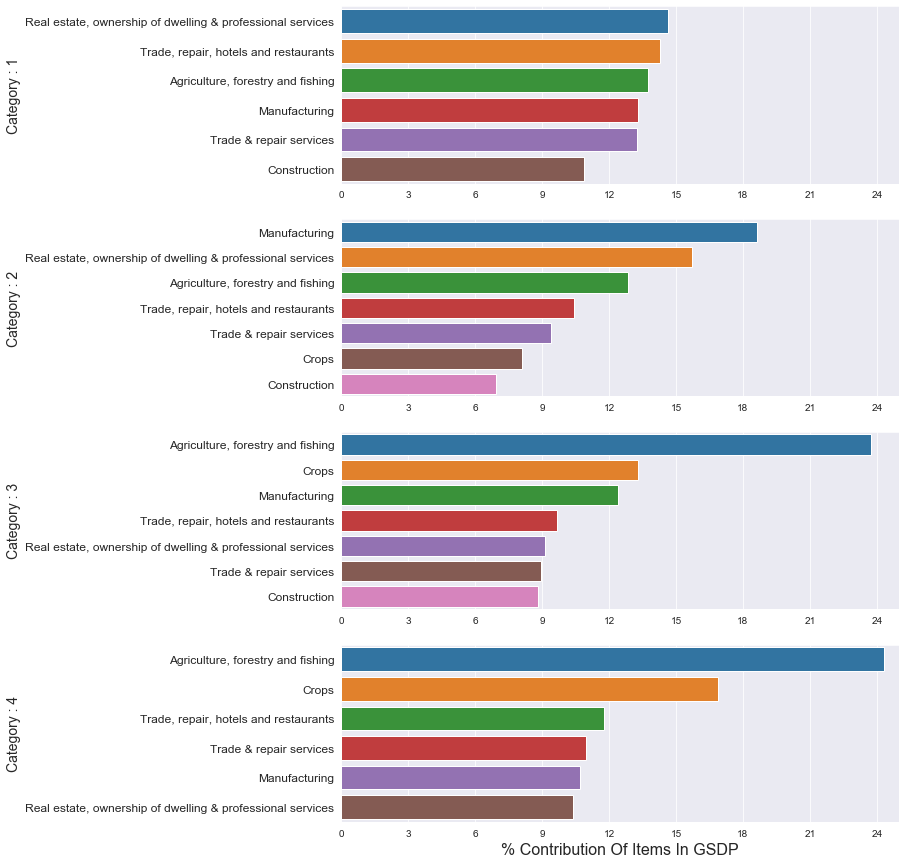

In [143]:
#Plotting contri of sectors having approx. 80% contri to GSDP to different State categories
figure = plt.figure(figsize = (10,15))# setting figure size
for index in range(len(category_df_list)):
    plt.subplot(4,1,index+1)
    ax = sns.barplot(x=category_df_list[index]['%Contri In GDP'], y=category_df_list[index]['Item'], 
                     data=category_df_list[index])
    plt.xlabel('')
    plt.ylabel('Category : '+str(index+1),fontsize = 14)
    plt.yticks(fontsize = 12)
    plt.xticks(np.arange(0,25,3), fontsize = 10)
    plt.xlim(0,25)#setting range of y axis
plt.xlabel('% Contribution Of Items In GSDP',fontsize = 16)
plt.show()

From the above graph we can clearly see that the "Construction" sub sector is contributing less to every category of States.
Also, we can see that  Agriculture, Trade and Manufacturing are the sub sectors which are contributing average to the GSDP for every state

We can see that all the subsectors of the states in category 1 are not contributing to GDP vary drastically as comparing of the states of other categories i.e. 2, 3 and 4.
The sub sectors which are highly correlated to the GDP is real estate because as the GDP is going down for each category. 

We can see that for category-4 states construction is not a highly contributing sector it contributes very less to GSDP
contribution of this sub sector is also going down consistently with rare exceptions.

We can clearly observe that for category1,2 states agriculture and crops are contributing averagely to the GSDP, but for catgory3,4 states agriculture and crop sectors have a very high contribution

Analysis Of Categories:

A) Category 1:
1. Trading... and Transport... sub sectors should collaborate and enhance each others growth by helping each other out as both these sub sectors can simultaneously use each other's resources.

2. Real estate sub sector should help with the other services sub sector as the professional services part of it can help in other services growth by delegating work.

3. Manufacturing can support other sectors to grow fastly

B) Category 2

1. Taxation rules should be changed to help the growth of financial services for category 2 states.

2. Same as point 1 for Category 1

3. Government should have to give more attention to crops and agriculture as they are comparatively giving lower contribution.

4. Construction sector can collaborate with Real estate ownership and Trade repair services.

C) Category 3

1. Construction and Trade& repair service have to work together that they can grow.

2. Overally all sectors are giving well contribution to GSDP as comparing to other categories

D) Category 4

1. Same as point 1 for Category 3

2. Same as point 2 for Category 2

# PART (2)

In [12]:
#File for Drop Outs is read here
drop_out_filename = r'C:/Users/adity/Downloads/Data Science/EDA/GDP Assignment/Data 2/Data 2.csv'
edu = pd.read_csv(drop_out_filename,sep=',')
#Read the file for GDP percapita for all the states of 2014-15 years
gdpc=combined_gsdp_df[['state','Per Capita GSDP (Rs.)','%Primary','%Secondary','%Tertiary',"Population ('00)"]]

In [174]:
cols=['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']
edu=edu[cols]
edu.rename(columns={'Level of Education - State': 'state', 'Primary - 2014-2015.1': 'Primary'}, inplace=True)

In [163]:
temp1=gdpc.state.tolist()
temp2=edu.state.tolist()
list((set(temp1) -set(temp2)) |  (set(temp2) -set(temp1)))

['Lakshadweep',
 'Dadra & Nagar Haveli',
 'Puducherry',
 'West Bengal',
 'Jammu and Kashmir',
 'A & N Islands',
 'Chhatisgarh',
 'Daman & Diu',
 'Chhattisgarh',
 'Uttrakhand',
 'All India',
 'Delhi',
 'Uttarakhand']

In [175]:
# some data removed for UTS because no GDP data found
gdpc.state=gdpc.state.replace({'_':' '},regex=True)
gdpc.state=gdpc.state.replace({'Uttarakhand':'Uttrakhand'},regex=True)
gdpc.state=gdpc.state.replace({'Chhattisgarh':'Chhatisgarh'},regex=True)

temp1=gdpc.state.tolist()
temp2=edu.state.tolist()
temp3=set(['AND'])
list((set(temp1) -set(temp2)) |  (set(temp2) -set(temp1)))

['Lakshadweep',
 'Dadra & Nagar Haveli',
 'Puducherry',
 'West Bengal',
 'Jammu and Kashmir',
 'A & N Islands',
 'Daman & Diu',
 'All India',
 'Delhi']

In [176]:
#Merge two data frame The Dropout rate and GDP per caita(Rs.)
master_df = pd.merge(gdpc, edu, how='inner', on='state')

In [177]:
master_df['Per Capita GSDP (Rs.)']=master_df['Per Capita GSDP (Rs.)'].astype(float)

correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state.

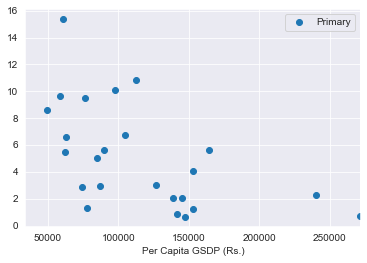

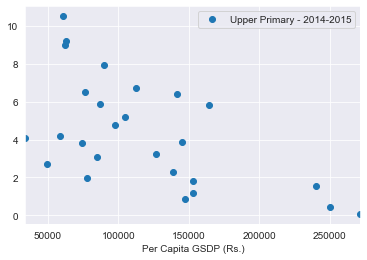

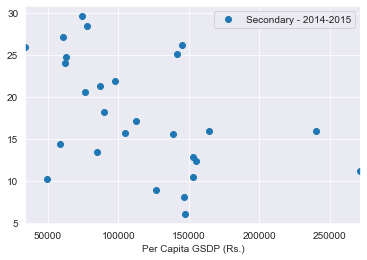

In [237]:
#correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state.
master_df.plot(x='Per Capita GSDP (Rs.)', y='Primary', style='o')
master_df.plot(x='Per Capita GSDP (Rs.)', y='Upper Primary - 2014-2015', style='o')
master_df.plot(x='Per Capita GSDP (Rs.)', y='Secondary - 2014-2015', style='o')
plt.show()

The correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP

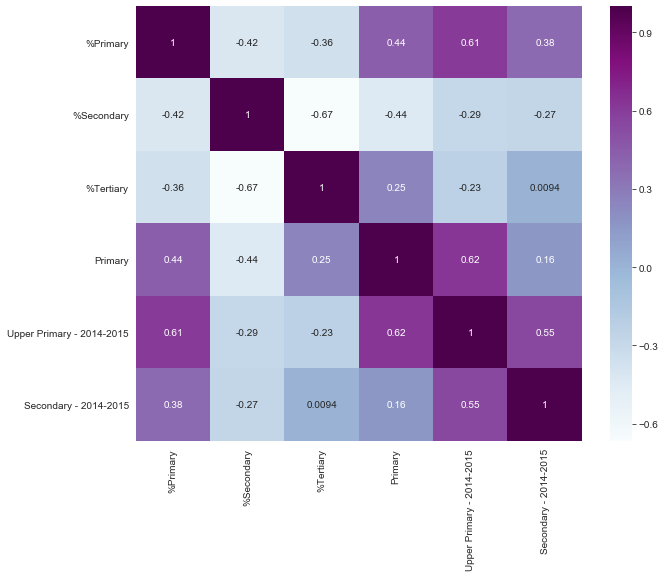

In [233]:
corel = pd.DataFrame(master_df[['%Primary', '%Secondary', '%Tertiary', 'Primary', 'Upper Primary - 2014-2015','Secondary - 2014-2015']])
cor = corel.corr()
round(cor, 3)
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(cor, cmap="BuPu", annot=True)
plt.show()

The correlation between dropout rates and population

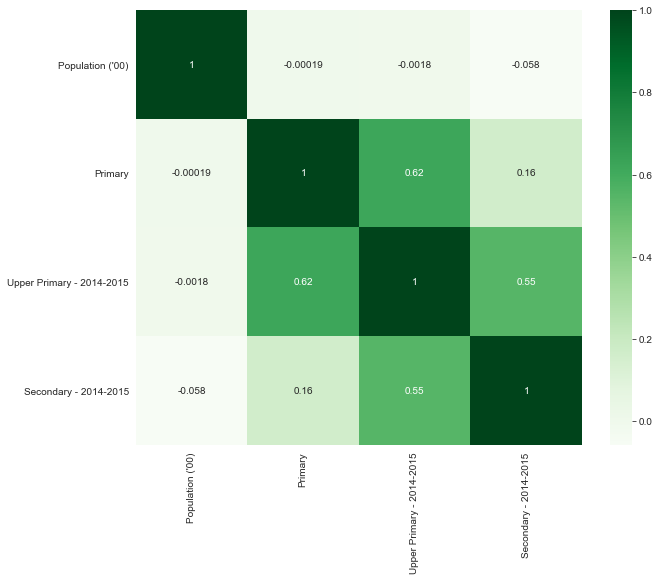

In [234]:
population = master_df[['state',"Population ('00)",'Primary', 'Upper Primary - 2014-2015','Secondary - 2014-2015']]
pop = pd.DataFrame(population[["Population ('00)",'Primary', 'Upper Primary - 2014-2015','Secondary - 2014-2015']])
correlation = pop.corr()
round(pop,3)
plt.figure(figsize= (10,8))
sns.heatmap(correlation, cmap = "Greens", annot =True)
plt.show()


In [238]:
population["Population ('00)"].corr(population['Primary'])

-0.058377335637831734

In [239]:
population["Population ('00)"].corr(population['Upper Primary - 2014-2015'])

-0.0018473472313924643

In [240]:
population["Population ('00)"].corr(population['Secondary - 2014-2015'])

-0.058377335637831734

We can clearly observe that all drop out categories have negative correlation with population of states.

Key Insights From Above Analysis

1. For the analysis of droupout sectors on per capita
   We can clearly observe that increase in per capita decrease in droupout rate for all the three sectors

2. Analysis of Droupout rates of various percapita percentile categories
   Droupout rate have a positive correlation with per capita percentile category %primary
   Droupout rate have a negative correlation with per capita percentile category %secondary
   Droupout rate primary and Secondary-2014-15 have a positive correlation with per capita percentile category %Tertiary
   and Upper primary have negative correlation.

3. We can obsereve that Population and Droupout rates have negative correlation   
   

Hypothesis based on above graphs


There is a high drop rate of Secondary category according to analysis students are droping study between class 5-8 so it seems to be due to their financial problems they are droping their study. If Government give more attention to the education and some concise in rules and regulation and facilities then droping rate will be reduced.